In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.decomposition import PCA
#from mpl_toolkits.mplot3d import Axes3D

In [3]:
#pagina web consultada https://www.jacobsoft.com.mx/es_mx/analisis-del-componente-principal/
df = pd.read_csv('birds.csv',sep=',',low_memory=False)
df.head()
df.tail()

,Bird,Longitud Total,Extension de las alas,Longitud pico y cabeza,Longitud del homero,Longitud de la quilla
44,45,155,235,30.7,17.7,19.6
45,46,162,247,31.9,19.1,20.4
46,47,153,237,30.6,18.6,20.4
47,48,162,245,32.5,18.5,21.1
48,49,164,248,32.3,18.8,20.9


In [ ]:
#Varianza: es la medida que nos indica que tan disperso o distribuido se encuentra un conjunto de valores.
#Covarianza: Es la medida de que tanto dos variables cambian juntas. Es una medida de fuerza de la correlación 
            #entre dos conjuntos de variables. Si la covarianza entre dos variables es cero, las variables no están 
            #correlacionadas. Sin embargo, el que dos variables no estén correlacionadas, no implica que sean independientes, dado que la correlación es sólo una medida de dependencia lineal
#Si la covarianza no es 0, el signo indica si las variables están positiva o negativamente correlacionadas.    
#Si dos variables están positivamente correlacionadas, significa que una incrementa su valor cuando la otra lo incrementa
#Cuando dos variables están negativamente correlacionadas significa que una variable tiene un decremento relativo a su media cuando la otra variable presenta un incremento relativo a su media.


In [13]:
#matriz de covarianza describe los valores de la covarianza entre cada par de valores del conjunto de datos. 
covarianza = np.cov(df.T)
print(covarianza)
#otra manera de sacar la matriz de covarianza.
cov = np.cov(np.transpose(df))
#print('\n',cov)

[[ 2.04166667e+02  1.31041667e+01  4.77083333e+00  7.22916667e-01
  -1.45833333e-02 -2.29166667e-01]
 [ 1.31041667e+01  1.33537415e+01  1.36109694e+01  1.92206633e+00
   1.33061224e+00  2.19221939e+00]
 [ 4.77083333e+00  1.36109694e+01  2.56828231e+01  2.71360544e+00
   2.19770408e+00  2.65782313e+00]
 [ 7.22916667e-01  1.92206633e+00  2.71360544e+00  6.31632653e-01
   3.42266156e-01  4.14647109e-01]
 [-1.45833333e-02  1.33061224e+00  2.19770408e+00  3.42266156e-01
   3.18418367e-01  3.39370748e-01]
 [-2.29166667e-01  2.19221939e+00  2.65782313e+00  4.14647109e-01
   3.39370748e-01  9.82823129e-01]]


In [ ]:
#Vectores Propios y valores propios: Un vector se describe por su direccion y magnitud o longitud. 
##Un vector propio de una matriz es un vector no cero que satisface la siguiente ecuacion Av = lanbda v (v es el vector propio A es una matriz cuadrada y lanbda es un escalar llamado valor propio)
#por lo que el vector propio de una matriz es un vector que pertenece a, y caracteriza la estructura de los datos.

##Tanto los vectores propios como los valores propios sólo pueden ser derivados de matrices cuadradas y no todas las matrices cuadradas tienen vectores propios o valores propios. 
##Los componentes principales de una matriz  son los vectores propios de su matriz de covarianzas, ordenados por sus correspondientes valores propios.
##El vector propio con el valor propio más grande es el primer componente principal, 
##el segundo componente principal es el vector propio con el segundo valor propio más grande y así sucesivamente. 

In [12]:
#Calcular los valores propios y vectores propios
v, w = np.linalg.eig(covarianza)
w; v

array([2.05247945e+02, 3.46181611e+01, 4.27980835e+00, 6.00244118e-01,
       7.72836959e-02, 3.12663510e-01])

In [ ]:
#Reducción de la dimensionalidad: utilizando PCA para reduccir el conjunto de datos a dos dimensiones 
#los componentes principales son los vectores propios de la matriz de covarianza ordenada por los valores propios.
#Los componentes principales se pueden encontrar utilizando dos técnicas diferentes. La primera técnica requiere calcular la matriz de covarianza de los datos. 
#La segunda técnica utiliza la descomposición del valor singular de la matriz de datos para encontrar los vectores y la raíz cuadrada de los valores propios de la matriz de covarianza.

In [38]:
X = df.iloc[:, 1:6].values
y = df.iloc[:, 0].values
y

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64)

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [46]:
# Explicación de la varianza
# Creamos un vector con el porcentaje de influencia de la varianza 
# para las dos variables resultantes del conjunto de datos
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.77995995, 0.08803669])

In [52]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

C:\Users\rrruiz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rrruiz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

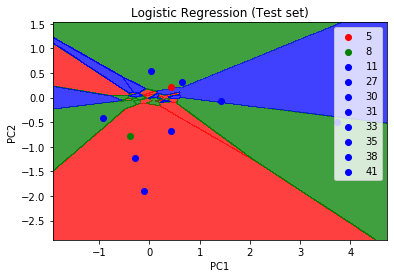

In [53]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [22]:
df.columns
cuanti=df.loc[:,['Longitud Total', 'Extension de las alas',
       'Longitud pico y cabeza', 'Longitud del homero',
       'Longitud de la quilla']]
cuanti.dtypes
#cuanti

Longitud Total              int64
Extension de las alas       int64
Longitud pico y cabeza    float64
Longitud del homero       float64
Longitud de la quilla     float64
dtype: object

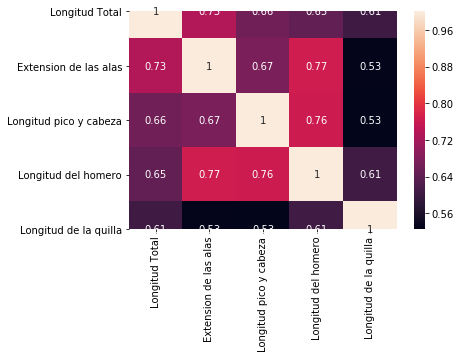

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cuanti.corr(), annot = True)
plt.show()

In [24]:
escala=StandardScaler()# estandarizar las variables
escala.fit(cuanti)# calcula media y desviacion estandar
CuantiScale=escala.transform(cuanti)
print(CuantiScale)
#Creamos un objeto PCA y aplicamos
pca=PCA(n_components=5) # Otra opcion pca=PCA(.85)
pca.fit(CuantiScale)
cuanti_pca=pca.transform(CuantiScale) # convertimos nuestros datos con las nuevas dimensiones de PCA
print("Ajuste de PCA", CuantiScale.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))

[[-0.54733295  0.73237324  0.1790186   0.05481173 -0.33278492]
 [-1.10030851 -0.26446811 -1.34653117 -1.01949826 -1.25002336]
 [-1.37679628 -0.26446811 -0.58375629 -0.12423993 -0.23086954]
 [-1.37679628 -1.06194119 -0.71088544 -1.37760159 -0.63853107]
 [-0.82382073  0.3336367   0.05188945  0.2338634  -0.53661569]
 [ 1.3880815   1.13110978  0.68753519  0.95007006  0.07487661]
 [-0.27084517 -0.66320465 -0.71088544 -0.12423993 -0.63853107]
 [-0.82382073 -0.46383638  1.70456837  0.2338634   0.38062275]
 [ 1.66456928  1.33047805  1.57743922  1.12912173  0.27870737]
 [ 0.00564261 -0.66320465 -0.58375629  0.59196673  1.19594581]
 [ 0.00564261 -0.26446811 -0.20236885  0.2338634   1.19594581]
 [ 0.55861816  0.53300497 -0.45662714  0.2338634  -0.33278492]
 [ 0.83510594  0.93174151  1.06892263  1.48722506  0.99211505]
 [-0.27084517  0.73237324  0.68753519  1.12912173 -0.84236183]
 [-0.27084517 -1.26130946  0.05188945 -0.66139493 -1.0461926 ]
 [-0.54733295 -0.86257292 -0.71088544 -0.84044659 -0.53

In [25]:
pca.components_

array([[-0.45179893, -0.46168085, -0.45054161, -0.47073887, -0.39767537],
       [ 0.05072137, -0.29956355, -0.32457242, -0.18468403,  0.87648935],
       [-0.69047023, -0.34054844,  0.45449265,  0.410935  ,  0.1784558 ],
       [-0.42041399,  0.54786307, -0.60629605,  0.38827811,  0.06887199],
       [ 0.3739091 , -0.53008046, -0.34279226,  0.65166652, -0.19243414]])

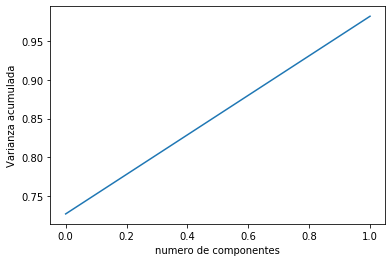

In [74]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('numero de componentes')
plt.ylabel('Varianza acumulada')
plt.show()
#pd.value_counts(df['Variedad'])
 

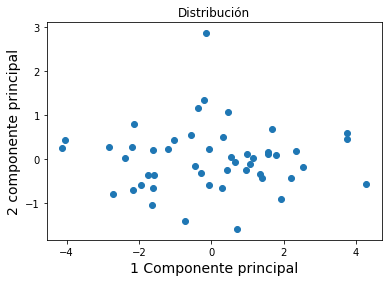

In [73]:
#graficamos en 2 Dimensiones, tomando los 2 primeros componentes principales
Xax=cuanti_pca[:,0]
Yax=cuanti_pca[:,1]
plt.scatter(Xax, Yax) 
plt.title("Distribución")
plt.xlabel("1 Componente principal",fontsize=14)
plt.ylabel("2 componente principal",fontsize=14)
#plt.legend()
plt.show()

In [60]:
DF=np.cov(df.T)
DF

array([[ 2.04166667e+02,  1.31041667e+01,  4.77083333e+00,
         7.22916667e-01, -1.45833333e-02, -2.29166667e-01],
       [ 1.31041667e+01,  1.33537415e+01,  1.36109694e+01,
         1.92206633e+00,  1.33061224e+00,  2.19221939e+00],
       [ 4.77083333e+00,  1.36109694e+01,  2.56828231e+01,
         2.71360544e+00,  2.19770408e+00,  2.65782313e+00],
       [ 7.22916667e-01,  1.92206633e+00,  2.71360544e+00,
         6.31632653e-01,  3.42266156e-01,  4.14647109e-01],
       [-1.45833333e-02,  1.33061224e+00,  2.19770408e+00,
         3.42266156e-01,  3.18418367e-01,  3.39370748e-01],
       [-2.29166667e-01,  2.19221939e+00,  2.65782313e+00,
         4.14647109e-01,  3.39370748e-01,  9.82823129e-01]])

In [61]:
scaler = StandardScaler()
DFT = scaler.fit_transform(DF)
[DFT[:,0].mean(),DFT[:,1].mean(),DFT[:,0].std(),DFT[:,1].std()]

[-4.625929269271486e-17, -1.8503717077085943e-16, 0.9999999999999998, 1.0]

In [63]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(DFT)
DFPC = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
DFPC.describe()

,PC1,PC2
count,6.000000e+00,6.000000e+00
mean,-1.110223e-16,-7.401487e-17
std,2.287858e+00,1.354785e+00
min,-1.652633e+00,-9.390067e-01
25%,-1.408272e+00,-8.687833e-01
50%,-1.316774e+00,-4.349479e-01
75%,1.133293e+00,4.668766e-02
max,3.774970e+00,2.615065e+00


In [64]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
per_var

array([72.7, 25.5])

In [65]:

COV=np.cov(np.transpose(DFT))
COV

array([[ 1.2       ,  0.56789851, -0.1986751 , -0.1940054 , -0.49500055,
        -0.62178175],
       [ 0.56789851,  1.2       ,  0.87109721,  0.91978025,  0.67949746,
         0.58883447],
       [-0.1986751 ,  0.87109721,  1.2       ,  1.18133968,  1.15749885,
         1.05155585],
       [-0.1940054 ,  0.91978025,  1.18133968,  1.2       ,  1.15006573,
         1.07022557],
       [-0.49500055,  0.67949746,  1.15749885,  1.15006573,  1.2       ,
         1.14690516],
       [-0.62178175,  0.58883447,  1.05155585,  1.07022557,  1.14690516,
         1.2       ]])

In [66]:
np.linalg.eig(COV)

(array([ 5.23429619e+00,  1.83544351e+00,  1.04499646e-01,  2.22062825e-02,
        -3.54536002e-16,  3.55436983e-03]),
 array([[ 0.12572046,  0.77775663,  0.16267786,  0.42524146,  0.33269423,
         -0.24760684],
        [-0.33701077,  0.56131145, -0.48146337, -0.32278673, -0.21214916,
          0.43628852],
        [-0.47030648,  0.06900666,  0.54470423,  0.33222762, -0.5966658 ,
          0.10469924],
        [-0.47428248,  0.08428172,  0.1275382 , -0.52771382,  0.0864335 ,
         -0.68244714],
        [-0.47046559, -0.13293858,  0.28160626, -0.00235859,  0.69062192,
          0.45246345],
        [-0.45071962, -0.22469107, -0.59114986,  0.57106549,  0.06219181,
         -0.25869669]]))

In [68]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

[-0.12572046  0.33701077  0.47030648  0.47428248  0.47046559  0.45071962]
5.234296188904404


ValueError: too many values to unpack (expected 2)

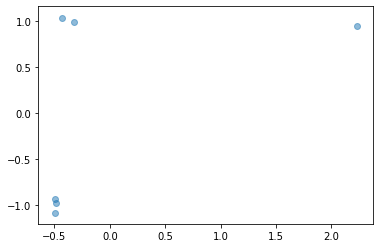

In [69]:
plt.scatter(DFT[:,0],DFT[:,1], alpha=0.5)
L2=[2,0.3]
i=0
for length, vector in zip(pca.explained_variance_, pca.components_):
  print(vector)
  print(length)
  v = vector*L2[i]
  i=+1
  draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')
plt.show()